# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:https://www.kaggle.com/datasets/dhanasekarjaisankar/correlation-between-posture-personality-trait

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
df = pd.read_csv('Myers Briggs.csv, index=True') # new df  created with final neccessary story analysis from check-point three cleaning and manipulation
df

,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,ESFJ,18,3,17,9,9,13,18,4,A
1,ISTJ,6,15,14,12,21,3,13,9,B
2,ESTJ,15,6,16,10,15,9,12,10,A
3,ISTJ,6,15,21,5,13,11,19,3,D
4,ENFJ,14,7,20,6,9,15,16,6,A
...,...,...,...,...,...,...,...,...,...,...
92,ESTP,19,2,22,4,19,5,2,20,B
93,ESFJ,11,10,17,9,6,18,13,9,B
94,ENFP,12,9,9,17,6,18,2,20,A
95,ESFJ,11,10,22,14,8,16,14,8,B


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

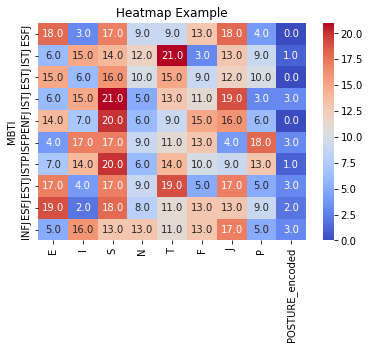

<Figure size 864x576 with 0 Axes>

In [62]:
#converting object data type in Posture column to int to include in the heatmap plot
label_encoder = LabelEncoder()
df['POSTURE_encoded'] = label_encoder.fit_transform(df['POSTURE'])
df
#creating a sub set of 10 rows, 97 rows was to many for the heatmap
subset_df = df.iloc[:10]
#decided to use the MBTI column as the index to see more data connections
subset_df.set_index('MBTI', inplace=True)

columns_to_plot = subset_df[['E', 'I','S', 'N','T', 'F','J','P', 'POSTURE_encoded']]
sns.heatmap(columns_to_plot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Heatmap Example')
plt.figure(figsize=(12,8))
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [68]:
X = df['S']
Y = df['J']
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train
Y_train


69     2
61     7
65    20
6      9
29     0
      ..
94     2
70     8
76    11
28    19
74    17
Name: J, Length: 77, dtype: int64

In [76]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train,X_train_sm).fit()
lr.params
lr.summary()

 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      J   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.509
Date:                Tue, 24 Oct 2023   Prob (F-statistic):              0.117
Time:                        22:35:47   Log-Likelihood:                -241.28
No. Observations:                  77   AIC:                             486.6
Df Residuals:                      75   BIC:                             491.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5965      2.141      3.549      0.001       3.332      11.861
S              0.2125      0.134      1.584      0.117      -0.055       0.480
==============================================================================
Omnibus:                       29.078   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.161
Skew:                          -0.091   Prob(JB):                       0.0757
Kurtosis:                       1.745   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

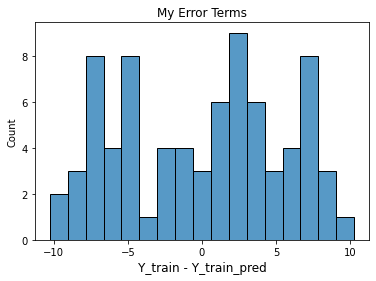

In [79]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

fig = plt.figure()
sns.histplot(res, bins = 17)
plt.title('My Error Terms', fontsize=12)
plt.xlabel('Y_train - Y_train_pred', fontsize=12)
plt.show()
    

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.032
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Yes
3. Was your plot of the error terms a bell curve? No